In [1]:
import pandas as pd
import numpy as np

#read in csv and display
df_init = pd.read_csv(r'C:\Users\andre\OneDrive\northeastern\DATA technical\KLDscores.csv') 
display(df_init)
df_init.info()

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,filename,kld_values
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2..."
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2..."
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238..."
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220..."
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2..."
...,...,...
23188,PG9971,"[0.22838257901564088, 0.21120893011566938, 0.2..."
23189,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291..."
23190,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2..."
23191,PG996,"[0.24116003079407344, 0.21510152162479515, 0.2..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23193 entries, 0 to 23192
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    23193 non-null  object
 1   kld_values  23193 non-null  object
dtypes: object(2)
memory usage: 362.5+ KB


In [2]:
from ast import literal_eval

#changes lists with str dtype
df_init['kld_values'] = df_init.kld_values.apply(lambda x: literal_eval((x)))

In [3]:
#isolate english-fiction

#initialize metadata csv
df1_init = pd.read_csv(r'C:\Users\andre\OneDrive\northeastern\DATA technical\SPGC-metadata-2018-07-18.csv')

#english
en = df1_init.loc[df1_init['language'] == "['en']", 'id']

#fiction
#if the string 'fiction' is in the lowercase string of subjects
fic = df1_init.loc[df1_init['subjects'].str.lower().str.contains('fiction'), 'id']

#intersection of fiction and engish to get english-fiction!!
en_fic = pd.Series(list(set(en).intersection(set(fic))))
en_fic

df = df_init[df_init['filename'].isin(en_fic)]
df

,filename,kld_values
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2..."
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2..."
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220..."
9,PG10057,"[0.22988547820277444, 0.24055226987795503, 0.2..."
10,PG10037,"[0.24227473043779557, 0.23228525036700534, 0.2..."
...,...,...
23184,PG9986,"[0.23145821926283078, 0.21821643194247953, 0.2..."
23186,PG9981,"[0.22398044121450278, 0.2177760219339848, 0.22..."
23189,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291..."
23190,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2..."


In [4]:
from scipy.stats import linregress
df['Average'] = df['kld_values'].apply(np.mean)
df['Variance'] = df['kld_values'].apply(np.var)

# Function to calculate the slope of linear regression for a list of numbers
def calculate_slope(numbers):
    x = list(range(len(numbers)))  # Generate x values as [0, 1, 2, ...]
    slope, intercept, r_value, p_value, std_err = linregress(x, numbers)
    return slope

# Apply the function to each row and create a new column with the slopes
df['Slope'] = df['kld_values'].apply(calculate_slope)
#adding other features
df['Max'] = df['kld_values'].apply(np.max)
df['Min'] = df['kld_values'].apply(np.min)
df['Range'] = df['Max'] - df['Min']


C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\andre\AppData\Local\Temp\ipykernel_16548\673009620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average'] = df['kld_values'].apply(np.mean)
C:\Users\andre\AppData\Local\Temp\ipykernel_16548\673009620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [6]:
from statsmodels.tsa.stattools import adfuller

#Function to calculate adf positive test statistic for a list of numbers
def calculate_adf(numbers):
    res = adfuller(numbers)
    return abs(res[0]) #adf absolute value test stat

df['Stationarity'] = df['kld_values'].apply(calculate_adf)

C:\Users\andre\AppData\Local\Temp\ipykernel_16548\2044617355.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stationarity'] = df['kld_values'].apply(calculate_adf)


In [7]:
df

,filename,kld_values,Average,Variance,Slope,Max,Min,Range,Stationarity
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.450747,0.192720,0.258026,0.099532
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.390158,0.206327,0.183832,5.622344
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.548940,0.204162,0.344778,1.015496
9,PG10057,"[0.22988547820277444, 0.24055226987795503, 0.2...",0.247845,0.001715,0.000090,0.481949,0.203087,0.278862,7.468118
10,PG10037,"[0.24227473043779557, 0.23228525036700534, 0.2...",0.250666,0.001194,-0.000112,0.391893,0.201637,0.190256,6.093013
...,...,...,...,...,...,...,...,...,...
23184,PG9986,"[0.23145821926283078, 0.21821643194247953, 0.2...",0.238457,0.000984,0.000811,0.336083,0.185911,0.150171,4.170598
23186,PG9981,"[0.22398044121450278, 0.2177760219339848, 0.22...",0.235281,0.001369,0.000817,0.459716,0.203732,0.255983,0.385642
23189,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.338172,0.192124,0.146047,6.184309
23190,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.406871,0.196882,0.209988,5.211601


In [30]:
import matplotlib.pyplot as plt

df2 = df1_init[['id', 'downloads']]

#adding downloads from df2 to df
A = pd.merge(df,df2,how='left',left_on='filename',right_on='id').drop(['id'], axis=1)

#A['downloads'].isna().sum() #check nan values

B = A[A['downloads'].notna()] #removing rows with NaN downloads
B['log(downloads)'] = B['downloads'].apply(np.log) #adding log column
B['log(downloads)'].replace(float('-inf'), 1, inplace=True) #dealing with -inf values when taking the log of 0
B['log(Stationarity)'] = B['Stationarity'].apply(np.log) #adding log column


C:\Users\andre\AppData\Local\Temp\ipykernel_16548\1921833354.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['log(downloads)'].replace(float('-inf'), 1, inplace=True) #dealing with -inf values when taking the log of 0


In [31]:
B

,filename,kld_values,Average,Variance,Slope,Max,Min,Range,Stationarity,downloads,log(downloads),log(Stationarity)
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.450747,0.192720,0.258026,0.099532,593.0,6.385194,-2.307273
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.390158,0.206327,0.183832,5.622344,17.0,2.833213,1.726749
2,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.548940,0.204162,0.344778,1.015496,47.0,3.850148,0.015377
3,PG10057,"[0.22988547820277444, 0.24055226987795503, 0.2...",0.247845,0.001715,0.000090,0.481949,0.203087,0.278862,7.468118,19.0,2.944439,2.010643
4,PG10037,"[0.24227473043779557, 0.23228525036700534, 0.2...",0.250666,0.001194,-0.000112,0.391893,0.201637,0.190256,6.093013,12.0,2.484907,1.807143
...,...,...,...,...,...,...,...,...,...,...,...,...
7758,PG9986,"[0.23145821926283078, 0.21821643194247953, 0.2...",0.238457,0.000984,0.000811,0.336083,0.185911,0.150171,4.170598,14.0,2.639057,1.428060
7759,PG9981,"[0.22398044121450278, 0.2177760219339848, 0.22...",0.235281,0.001369,0.000817,0.459716,0.203732,0.255983,0.385642,84.0,4.430817,-0.952845
7760,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.338172,0.192124,0.146047,6.184309,8.0,2.079442,1.822015
7761,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.406871,0.196882,0.209988,5.211601,28.0,3.332205,1.650887


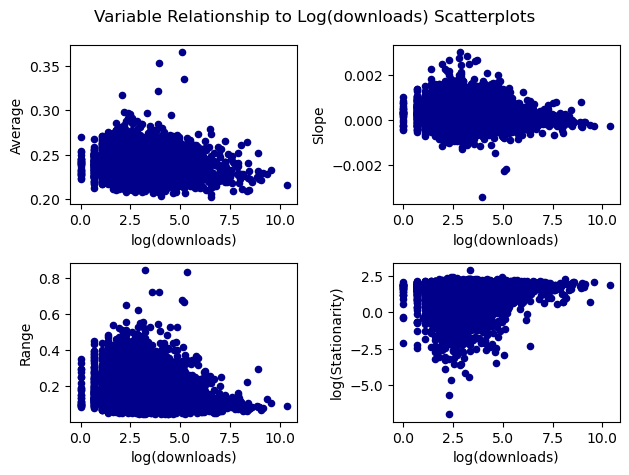

In [32]:
%matplotlib inline
#plot relationship scatterplots in a 2 by 2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2)

B.plot.scatter(x='log(downloads)', y='Average', c='DarkBlue', ax=axes[0,0])
B.plot.scatter(x='log(downloads)', y='Slope', c='DarkBlue', ax=axes[0,1])
B.plot.scatter(x='log(downloads)', y='Range', c='DarkBlue', ax=axes[1,0])
B.plot.scatter(x='log(downloads)', y='log(Stationarity)', c='DarkBlue', ax=axes[1,1])
fig.suptitle('Variable Relationship to Log(downloads) Scatterplots')
plt.tight_layout()

plt.show()

In [57]:
#initialize extra controls dataframe
df_ec = pd.read_csv('extra_controls.csv')
df_ec

,id,subj2_war,subj2_adventure,subj2_comedy,subj2_biography,subj2_romance,subj2_drama,subj2_fantasy,subj2_family,subj2_sciencefiction,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,PG10002,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.224141,0.08737,0.002701,50831.0
1,PG10005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.221966,0.13182,0.003394,70142.0
2,PG10006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.388199,0.18372,0.001003,13193.0
3,PG10007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.301656,0.15722,0.002895,27980.0
4,PG10008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.204838,0.10778,0.003655,65421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18721,PG9986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.180942,0.14979,0.006868,85950.0
18722,PG9988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.236141,0.13800,0.002923,47645.0
18723,PG9990,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.212310,0.14208,0.004579,54820.0
18724,PG9991,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.295010,0.11653,0.002811,26606.0


In [60]:
#find id values of subjects in df_ec and get dataframes of their features from B

#romance
rom = df_ec.loc[df_ec['subj2_romance'] == 1, 'id']
rom_df = B[B['filename'].isin(rom)]

#fantasy
fan = df_ec.loc[df_ec['subj2_fantasy'] == 1, 'id']
fan_df = B[B['filename'].isin(fan)]

#scifi
sf = df_ec.loc[df_ec['subj2_sciencefiction'] == 1, 'id']
sf_df = B[B['filename'].isin(sf)]

#adventure
ad = df_ec.loc[df_ec['subj2_adventure'] == 1, 'id']
ad_df = B[B['filename'].isin(ad)]

#history
hist = df_ec.loc[df_ec['subj2_history'] == 1, 'id']
hist_df = B[B['filename'].isin(hist)]

#get averages of each genre's columns
r_avg = rom_df.drop(["filename", "kld_values"], axis=1).mean(axis=0)
f_avg = fan_df.drop(["filename", "kld_values"], axis=1).mean(axis=0)
s_avg = sf_df.drop(["filename", "kld_values"], axis=1).mean(axis=0)
a_avg = ad_df.drop(["filename", "kld_values"], axis=1).mean(axis=0)
h_avg = hist_df.drop(["filename", "kld_values"], axis=1).mean(axis=0)

#put average into a dataframe
df_avg = pd.concat([r_avg, f_avg, s_avg, a_avg, h_avg], axis=1).reset_index()
df_avg.rename(columns={0: "Romance", 1: "Fantasy", 2: "SciFi", 3: "Adventure", 4: "History"}, inplace=True)
display(df_avg)

,index,Romance,Fantasy,SciFi,Adventure,History
0,Average,0.236617,0.241597,0.243643,0.237161,0.236294
1,Variance,0.001162,0.001065,0.001063,0.001055,0.000978
2,Slope,0.000334,0.000235,0.000290,0.000302,0.000277
3,Max,0.374947,0.360201,0.370237,0.365488,0.356615
4,Min,0.194022,0.196953,0.199700,0.194323,0.195307
5,Range,0.180925,0.163248,0.170537,0.171165,0.161309
6,Stationarity,4.715743,5.071877,5.007202,4.848869,4.867488
7,downloads,217.703529,211.421053,125.252336,99.130068,77.660042
8,log(downloads),3.247432,4.246834,4.197575,3.067011,3.072446
9,log(Stationarity),1.352022,1.475285,1.452990,1.405530,1.411648


In [85]:
#preparing features
C = B.drop(['filename', 'kld_values'], axis=1)
C

,Average,Variance,Slope,Max,Min,Range,Stationarity,downloads,log(downloads),log(Stationarity)
0,0.234033,0.001644,0.000870,0.450747,0.192720,0.258026,0.099532,593.0,6.385194,-2.307273
1,0.243351,0.001105,0.000143,0.390158,0.206327,0.183832,5.622344,17.0,2.833213,1.726749
2,0.240153,0.002246,0.000813,0.548940,0.204162,0.344778,1.015496,47.0,3.850148,0.015377
3,0.247845,0.001715,0.000090,0.481949,0.203087,0.278862,7.468118,19.0,2.944439,2.010643
4,0.250666,0.001194,-0.000112,0.391893,0.201637,0.190256,6.093013,12.0,2.484907,1.807143
...,...,...,...,...,...,...,...,...,...,...
7758,0.238457,0.000984,0.000811,0.336083,0.185911,0.150171,4.170598,14.0,2.639057,1.428060
7759,0.235281,0.001369,0.000817,0.459716,0.203732,0.255983,0.385642,84.0,4.430817,-0.952845
7760,0.234510,0.000634,0.000134,0.338172,0.192124,0.146047,6.184309,8.0,2.079442,1.822015
7761,0.228159,0.000825,0.000612,0.406871,0.196882,0.209988,5.211601,28.0,3.332205,1.650887


[1.01850166e+01 2.11731348e+02 9.06389913e+01 1.79495362e+00
 5.30763860e+00 1.35623006e+00 1.12684522e-02]
['Average' 'Variance' 'Slope' 'Max' 'Min' 'Range' 'Stationarity']


C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Text(0, 0.5, 'Importance(normalized)')

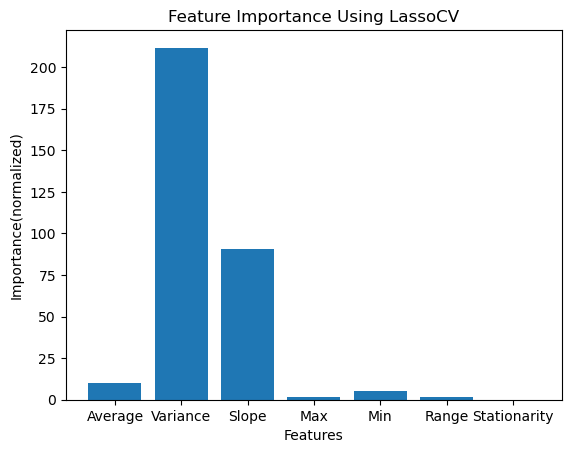

In [89]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

#train test split without logs
X, y = C.drop(['downloads', 'log(downloads)', 'log(Stationarity)'], axis=1), C['log(downloads)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit LassoCV model 
lasso_cv = LassoCV(cv=5,normalize=True) 
clf = lasso_cv.fit(X_train, y_train)

importance = np.abs(clf.coef_)
print(importance)
print(X.columns.values)

#plot feature importance
plt.bar(X.columns.values, importance )
plt.title('Feature Importance Using LassoCV')
plt.xlabel('Features')
plt.ylabel('Importance(normalized)')